## Load the Libraries

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import sklearn
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the dataset

### a) (4 points) Load the data, taking care to separate the target binary class label we want to predict, smiling, from the input attributes. Summarise the main properties of both the training and test splits.

In [2]:
dataset_train = pd.read_csv('./data/faces_train_data.csv')
dataset_test = pd.read_csv('./data/faces_test_data.csv')
print(dataset_train.shape)
print(dataset_test.shape)

(4800, 137)
(1200, 137)


In [3]:
dataset_train.head(10)

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21,x22,y22,x23,y23,x24,y24,x25,y25,x26,y26,x27,y27,x28,y28,x29,y29,x30,y30,x31,y31,x32,y32,x33,y33,x34,y34,x35,y35,x36,y36,x37,y37,x38,y38,x39,y39,x40,y40,x41,y41,x42,y42,x43,y43,x44,y44,x45,y45,x46,y46,x47,y47,x48,y48,x49,y49,x50,y50,x51,y51,x52,y52,x53,y53,x54,y54,x55,y55,x56,y56,x57,y57,x58,y58,x59,y59,x60,y60,x61,y61,x62,y62,x63,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
0,-1.861,1.350,-1.835,0.892,-1.756,0.458,-1.704,-0.000,-1.625,-0.458,-1.389,-0.847,-1.022,-1.144,-0.550,-1.373,0.000,-1.442,0.550,-1.396,1.049,-1.213,1.442,-0.938,1.730,-0.572,1.861,-0.137,1.940,0.320,2.018,0.778,2.071,1.236,-1.625,1.831,-1.363,2.014,-0.996,2.014,-0.655,1.922,-0.367,1.785,0.524,1.762,0.839,1.899,1.180,1.991,1.547,1.968,1.809,1.762,0.079,1.419,0.079,1.167,0.079,0.938,0.079,0.686,-0.288,0.366,-0.131,0.343,0.026,0.320,0.210,0.343,0.367,0.366,-1.206,1.373,-0.970,1.487,-0.682,1.464,-0.446,1.281,-0.708,1.236,-0.996,1.259,0.577,1.259,0.813,1.442,1.101,1.442,1.337,1.304,1.127,1.213,0.839,1.213,-0.629,-0.320,-0.446,-0.069,-0.183,0.046,0.0,-0.0,0.183,0.046,0.446,-0.092,0.629,-0.366,0.419,-0.549,0.183,-0.641,-0.026,-0.664,-0.236,-0.641,-0.472,-0.549,-0.524,-0.320,-0.183,-0.160,0.000,-0.160,0.183,-0.160,0.498,-0.343,0.183,-0.389,-0.026,-0.389,-0.210,-0.389,0
1,-1.920,1.523,-1.920,1.066,-1.833,0.571,-1.746,0.076,-1.571,-0.343,-1.309,-0.723,-0.960,-1.066,-0.524,-1.371,0.000,-1.447,0.567,-1.371,1.004,-1.104,1.353,-0.761,1.658,-0.343,1.833,0.114,1.920,0.609,2.008,1.104,2.008,1.561,-1.658,1.789,-1.440,1.980,-1.091,2.018,-0.742,1.980,-0.436,1.866,0.393,1.866,0.742,1.980,1.047,2.018,1.397,1.980,1.658,1.827,0.000,1.599,0.000,1.294,0.000,1.028,0.000,0.723,-0.480,0.495,-0.262,0.419,0.000,0.381,0.262,0.419,0.480,0.495,-1.222,1.523,-1.004,1.637,-0.742,1.637,-0.524,1.485,-0.742,1.447,-1.004,1.447,0.524,1.523,0.742,1.637,1.004,1.637,1.222,1.523,1.004,1.485,0.786,1.485,-0.829,-0.038,-0.524,0.038,-0.218,0.076,0.0,-0.0,0.218,0.076,0.524,0.038,0.829,-0.038,0.567,-0.305,0.262,-0.457,0.000,-0.495,-0.262,-0.457,-0.567,-0.305,-0.742,-0.076,-0.218,-0.076,0.000,-0.076,0.218,-0.076,0.742,-0.076,0.262,-0.267,0.000,-0.305,-0.262,-0.267,1
2,-1.247,1.177,-1.256,0.806,-1.183,0.403,-0.983,0.008,-0.746,-0.371,-0.501,-0.759,-0.264,-1.138,0.009,-1.470,0.446,-1.565,0.974,-1.446,1.475,-1.177,1.939,-0.822,2.321,-0.419,2.576,0.063,2.676,0.608,2.640,1.162,2.558,1.699,-1.384,1.644,-1.256,1.754,-1.047,1.762,-0.810,1.707,-0.601,1.628,-0.018,1.746,0.273,1.896,0.619,1.991,0.983,2.015,1.320,1.928,-0.319,1.375,-0.346,1.083,-0.391,0.790,-0.428,0.498,-0.592,0.316,-0.419,0.237,-0.191,0.205,0.082,0.316,0.337,0.442,-1.065,1.343,-0.910,1.462,-0.701,1.470,-0.492,1.335,-0.701,1.304,-0.901,1.296,0.391,1.430,0.519,1.596,0.756,1.620,1.020,1.557,0.792,1.478,0.583,1.438,-0.501,-0.182,-0.446,-0.047,-0.228,0.008,0.0,-0.0,0.264,0.079,0.792,0.103,1.329,0.047,0.983,-0.427,0.528,-0.703,0.209,-0.766,-0.064,-0.751,-0.319,-0.529,-0.419,-0.198,-0.200,-0.111,0.036,-0.111,0.310,-0.055,1.247,0.016,0.464,-0.506,0.173,-0.553,-0.082,-0.537,1
3,-1.660,1.812,-1.701,1.324,-1.660,0.801,-1.620,0.314,-1.498,-0.139,-1.296,-0.557,-1.012,-0.976,-0.648,-1.289,-0.162,-1.394,0.364,-1.324,0.850,-1.080,1.255,-0.767,1.579,-0.383,1.862,0.070,2.024,0.523,2.186,1.045,2.267,1.533,-1.377,2.021,-1.093,2.091,-0.810,2.056,-0.526,1.986,-0.243,1.882,0.607,1.882,0.931,1.916,1.296,1.916,1.620,1.882,1.862,1.742,0.162,1.568,0.121,1.220,0.040,0.906,0.000,0.557,-0.445,0.418,-0.243,0.348,0.000,0.279,0.243,0.314,0.445,0.383,-1.012,1.672,-0.769,1.742,-0.567,1.707,-0.364,1.603,-0.567,1.603,-0.810,1.638,0.769,1.498,0.972,1.603,1.215,1.568,1.458,1.463,1.215,1.463,0.972,1.463,-0.931,0.035,-0.567,0.035,-0.243,0.035,0.0,-0.0,0.283,0.035,0.607,-0.000,0.972,-0.000,0.648,-0.314,0.283,-0.453,-0.040,-0.488,-0.324,-0.453,-0.648,-0.279,-0.850,-0.000,-0.283,-0.070,0.000,-0.105,0.283,-0.070,0.891,-0.035,0.283,-0.279,0.00

In [4]:
X_train = dataset_train.iloc[:,:-1]
X_test = dataset_test.iloc[:,:-1]
y_train = dataset_train.iloc[:,-1]
y_test = dataset_test.iloc[:,-1]
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)
# y_train

X_train.shape:  (4800, 136)
X_test.shape:  (1200, 136)
y_train.shape:  (4800,)
y_test.shape:  (1200,)


In [5]:
y_train.head(10)

0    0
1    1
2    1
3    0
4    0
5    1
6    1
7    0
8    1
9    0
Name: smiling, dtype: int64

In [6]:
print(len([x for x in y_train if x == 1]))
print(len([x for x in y_train if x == 0]))
print(len([x for x in y_test if x == 1]))
print(len([x for x in y_test if x == 0]))

2335
2465
592
608


In [7]:
 ## Summarise the main properties of both the training and test splits

def get_properties(x):
    print('shape: ', x.shape)
    print('data range: /')
    print('data type: ')
    print(x.info())
    print('------------------')

print('dataset_train: ')
get_properties(dataset_train)
print('dataset_test: ')
get_properties(dataset_test)

dataset_train: 
shape:  (4800, 137)
data range: /
data type: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Columns: 137 entries, x0 to smiling
dtypes: float64(136), int64(1)
memory usage: 5.0 MB
None
------------------
dataset_test: 
shape:  (1200, 137)
data range: /
data type: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Columns: 137 entries, x0 to smiling
dtypes: float64(136), int64(1)
memory usage: 1.3 MB
None
------------------


In [71]:
dataset_train.head(10)

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21,x22,y22,x23,y23,x24,y24,x25,y25,x26,y26,x27,y27,x28,y28,x29,y29,x30,y30,x31,y31,x32,y32,x33,y33,x34,y34,x35,y35,x36,y36,x37,y37,x38,y38,x39,y39,x40,y40,x41,y41,x42,y42,x43,y43,x44,y44,x45,y45,x46,y46,x47,y47,x48,y48,x49,y49,x50,y50,x51,y51,x52,y52,x53,y53,x54,y54,x55,y55,x56,y56,x57,y57,x58,y58,x59,y59,x60,y60,x61,y61,x62,y62,x63,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
0,-1.861,1.350,-1.835,0.892,-1.756,0.458,-1.704,-0.000,-1.625,-0.458,-1.389,-0.847,-1.022,-1.144,-0.550,-1.373,0.000,-1.442,0.550,-1.396,1.049,-1.213,1.442,-0.938,1.730,-0.572,1.861,-0.137,1.940,0.320,2.018,0.778,2.071,1.236,-1.625,1.831,-1.363,2.014,-0.996,2.014,-0.655,1.922,-0.367,1.785,0.524,1.762,0.839,1.899,1.180,1.991,1.547,1.968,1.809,1.762,0.079,1.419,0.079,1.167,0.079,0.938,0.079,0.686,-0.288,0.366,-0.131,0.343,0.026,0.320,0.210,0.343,0.367,0.366,-1.206,1.373,-0.970,1.487,-0.682,1.464,-0.446,1.281,-0.708,1.236,-0.996,1.259,0.577,1.259,0.813,1.442,1.101,1.442,1.337,1.304,1.127,1.213,0.839,1.213,-0.629,-0.320,-0.446,-0.069,-0.183,0.046,0.0,-0.0,0.183,0.046,0.446,-0.092,0.629,-0.366,0.419,-0.549,0.183,-0.641,-0.026,-0.664,-0.236,-0.641,-0.472,-0.549,-0.524,-0.320,-0.183,-0.160,0.000,-0.160,0.183,-0.160,0.498,-0.343,0.183,-0.389,-0.026,-0.389,-0.210,-0.389,0
1,-1.920,1.523,-1.920,1.066,-1.833,0.571,-1.746,0.076,-1.571,-0.343,-1.309,-0.723,-0.960,-1.066,-0.524,-1.371,0.000,-1.447,0.567,-1.371,1.004,-1.104,1.353,-0.761,1.658,-0.343,1.833,0.114,1.920,0.609,2.008,1.104,2.008,1.561,-1.658,1.789,-1.440,1.980,-1.091,2.018,-0.742,1.980,-0.436,1.866,0.393,1.866,0.742,1.980,1.047,2.018,1.397,1.980,1.658,1.827,0.000,1.599,0.000,1.294,0.000,1.028,0.000,0.723,-0.480,0.495,-0.262,0.419,0.000,0.381,0.262,0.419,0.480,0.495,-1.222,1.523,-1.004,1.637,-0.742,1.637,-0.524,1.485,-0.742,1.447,-1.004,1.447,0.524,1.523,0.742,1.637,1.004,1.637,1.222,1.523,1.004,1.485,0.786,1.485,-0.829,-0.038,-0.524,0.038,-0.218,0.076,0.0,-0.0,0.218,0.076,0.524,0.038,0.829,-0.038,0.567,-0.305,0.262,-0.457,0.000,-0.495,-0.262,-0.457,-0.567,-0.305,-0.742,-0.076,-0.218,-0.076,0.000,-0.076,0.218,-0.076,0.742,-0.076,0.262,-0.267,0.000,-0.305,-0.262,-0.267,1
2,-1.247,1.177,-1.256,0.806,-1.183,0.403,-0.983,0.008,-0.746,-0.371,-0.501,-0.759,-0.264,-1.138,0.009,-1.470,0.446,-1.565,0.974,-1.446,1.475,-1.177,1.939,-0.822,2.321,-0.419,2.576,0.063,2.676,0.608,2.640,1.162,2.558,1.699,-1.384,1.644,-1.256,1.754,-1.047,1.762,-0.810,1.707,-0.601,1.628,-0.018,1.746,0.273,1.896,0.619,1.991,0.983,2.015,1.320,1.928,-0.319,1.375,-0.346,1.083,-0.391,0.790,-0.428,0.498,-0.592,0.316,-0.419,0.237,-0.191,0.205,0.082,0.316,0.337,0.442,-1.065,1.343,-0.910,1.462,-0.701,1.470,-0.492,1.335,-0.701,1.304,-0.901,1.296,0.391,1.430,0.519,1.596,0.756,1.620,1.020,1.557,0.792,1.478,0.583,1.438,-0.501,-0.182,-0.446,-0.047,-0.228,0.008,0.0,-0.0,0.264,0.079,0.792,0.103,1.329,0.047,0.983,-0.427,0.528,-0.703,0.209,-0.766,-0.064,-0.751,-0.319,-0.529,-0.419,-0.198,-0.200,-0.111,0.036,-0.111,0.310,-0.055,1.247,0.016,0.464,-0.506,0.173,-0.553,-0.082,-0.537,1
3,-1.660,1.812,-1.701,1.324,-1.660,0.801,-1.620,0.314,-1.498,-0.139,-1.296,-0.557,-1.012,-0.976,-0.648,-1.289,-0.162,-1.394,0.364,-1.324,0.850,-1.080,1.255,-0.767,1.579,-0.383,1.862,0.070,2.024,0.523,2.186,1.045,2.267,1.533,-1.377,2.021,-1.093,2.091,-0.810,2.056,-0.526,1.986,-0.243,1.882,0.607,1.882,0.931,1.916,1.296,1.916,1.620,1.882,1.862,1.742,0.162,1.568,0.121,1.220,0.040,0.906,0.000,0.557,-0.445,0.418,-0.243,0.348,0.000,0.279,0.243,0.314,0.445,0.383,-1.012,1.672,-0.769,1.742,-0.567,1.707,-0.364,1.603,-0.567,1.603,-0.810,1.638,0.769,1.498,0.972,1.603,1.215,1.568,1.458,1.463,1.215,1.463,0.972,1.463,-0.931,0.035,-0.567,0.035,-0.243,0.035,0.0,-0.0,0.283,0.035,0.607,-0.000,0.972,-0.000,0.648,-0.314,0.283,-0.453,-0.040,-0.488,-0.324,-0.453,-0.648,-0.279,-0.850,-0.000,-0.283,-0.070,0.000,-0.105,0.283,-0.070,0.891,-0.035,0.283,-0.279,0.00

### (b) (4 points) Even though the input attributes are high dimensional, they actually consist of a set of 2D coordinates representing points on the faces of each person in the dataset. Create a scatter plot of the average location for each 2D coordinate. One for (i) smiling and (ii) one not smiling faces. For instance, in the case of smiling faces, you would average each of the rows where smiling = 1. You can plot both on the same figure, but use different colors for each of the two cases. Comment on any difference you notice between the two sets of points.
Hint: Your plot should contain two faces.

In [101]:
## Get all the rows that smile = 1
# smile_data = [x for x in dataset_train if x["smiling"] == 1]
smiling_1 = dataset_train[dataset_train["smiling"] == 1].iloc[:,:-1]
smiling_0 = dataset_train[dataset_train["smiling"] == 0].iloc[:,:-1]

mylist = []
sdlist = []
trying = []
for x in smiling_1.columns.tolist():  
#     print(x)
#     print(np.average(smiling_1[x]))
#     print(np.average(smiling_0[x]))
    mu1 = smiling_1[x].mean()
    mu2 = smiling_0[x].mean()

    std1 = smiling_1[x].std()
    std2 = smiling_0[x].std()
#     print('smiling mu')
#     print(np.abs(mu1- mu2) + np.abs(std1-std2))
#     print(np.abs(mu1-mu2))
#     print(np.abs(std1-std2))
#     print(np.abs(np.average(smiling_1[x])-np.average(smiling_0[x])))
    mylist.append(np.abs(mu1-mu2))
    sdlist.append(np.abs(std1-std2))
    trying.append(np.abs(mu1-mu2)-np.abs(std1-std2))
mu1 = smiling_1['x50'].mean()
mu2 = smiling_0['x50'].mean()

print(mu1, mu2)
print((mu1+mu2)/2)
# std1 = smiling_1['x50'].std()
# std2 = smiling_0['x50'].std()
# print(mu1, mu2)
# print(std1, std2)
mu = sorted(list(zip(dataset_train.columns, mylist)),reverse=True)
# mu

-0.2210124197002144 -0.18105638945233282
-0.2010344045762736


In [98]:
sorted(list(zip(trying, dataset_train.columns)))

[(-0.1702470094345479, 'x13'),
 (-0.16898527050508333, 'x14'),
 (-0.16042146837292331, 'x0'),
 (-0.1568760626225093, 'x1'),
 (-0.15426207527474056, 'x12'),
 (-0.15231251832500153, 'x2'),
 (-0.14967454117428858, 'x15'),
 (-0.14318421602236725, 'x16'),
 (-0.1428084106338457, 'x3'),
 (-0.14169268579710353, 'x11'),
 (-0.1342958514875523, 'x4'),
 (-0.13015339756661687, 'x5'),
 (-0.12735695706017863, 'x26'),
 (-0.12347631922009544, 'x10'),
 (-0.12013813454765526, 'x6'),
 (-0.11492663392101393, 'y16'),
 (-0.11472666862017095, 'x25'),
 (-0.10435540586718589, 'x7'),
 (-0.104248870685417, 'x45'),
 (-0.10073753795172313, 'x24'),
 (-0.10005232349472098, 'y15'),
 (-0.09947512980193474, 'x9'),
 (-0.0930365092562179, 'x8'),
 (-0.09105472971435144, 'x43'),
 (-0.08915743167546214, 'x23'),
 (-0.08890531938662305, 'x44'),
 (-0.0877300273398815, 'x46'),
 (-0.08632857921523213, 'y0'),
 (-0.08594175874479276, 'x17'),
 (-0.08533642983770748, 'x47'),
 (-0.08333949893713671, 'x42'),
 (-0.08282662162624171, 'y1

In [95]:
sorted(list(zip(dataset_train.columns,sdlist)))

[('x0', 0.1773476633683851),
 ('x1', 0.1749496956258868),
 ('x10', 0.1251201108902022),
 ('x11', 0.14350303887726962),
 ('x12', 0.16310046628203168),
 ('x13', 0.1764367275871797),
 ('x14', 0.1780588053461804),
 ('x15', 0.17428924553643),
 ('x16', 0.17591312915744356),
 ('x17', 0.13165492942988538),
 ('x18', 0.1244401761976427),
 ('x19', 0.11548765037960179),
 ('x2', 0.17951527555578356),
 ('x20', 0.10623695303768693),
 ('x21', 0.09736018202426439),
 ('x22', 0.09097128503654484),
 ('x23', 0.10114420930314855),
 ('x24', 0.11093979915894481),
 ('x25', 0.1217775401361692),
 ('x26', 0.1310286633030417),
 ('x27', 0.07169847176982214),
 ('x28', 0.05898480632378128),
 ('x29', 0.04726739995266804),
 ('x3', 0.17880604952695772),
 ('x30', 0.0377059630552517),
 ('x31', 0.02293110606616318),
 ('x32', 0.01176307067305385),
 ('x33', 0.005155645692121527),
 ('x34', 0.010091816002354106),
 ('x35', 0.02117222584493382),
 ('x36', 0.10796369598685945),
 ('x37', 0.09930183876389048),
 ('x38', 0.09266479581

In [72]:
smiling_1.head()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21,x22,y22,x23,y23,x24,y24,x25,y25,x26,y26,x27,y27,x28,y28,x29,y29,x30,y30,x31,y31,x32,y32,x33,y33,x34,y34,x35,y35,x36,y36,x37,y37,x38,y38,x39,y39,x40,y40,x41,y41,x42,y42,x43,y43,x44,y44,x45,y45,x46,y46,x47,y47,x48,y48,x49,y49,x50,y50,x51,y51,x52,y52,x53,y53,x54,y54,x55,y55,x56,y56,x57,y57,x58,y58,x59,y59,x60,y60,x61,y61,x62,y62,x63,y63,x64,y64,x65,y65,x66,y66,x67,y67
1,-1.920,1.523,-1.920,1.066,-1.833,0.571,-1.746,0.076,-1.571,-0.343,-1.309,-0.723,-0.960,-1.066,-0.524,-1.371,0.000,-1.447,0.567,-1.371,1.004,-1.104,1.353,-0.761,1.658,-0.343,1.833,0.114,1.920,0.609,2.008,1.104,2.008,1.561,-1.658,1.789,-1.440,1.980,-1.091,2.018,-0.742,1.980,-0.436,1.866,0.393,1.866,0.742,1.980,1.047,2.018,1.397,1.980,1.658,1.827,0.000,1.599,0.000,1.294,0.000,1.028,0.000,0.723,-0.480,0.495,-0.262,0.419,0.000,0.381,0.262,0.419,0.480,0.495,-1.222,1.523,-1.004,1.637,-0.742,1.637,-0.524,1.485,-0.742,1.447,-1.004,1.447,0.524,1.523,0.742,1.637,1.004,1.637,1.222,1.523,1.004,1.485,0.786,1.485,-0.829,-0.038,-0.524,0.038,-0.218,0.076,0.0,-0.0,0.218,0.076,0.524,0.038,0.829,-0.038,0.567,-0.305,0.262,-0.457,0.000,-0.495,-0.262,-0.457,-0.567,-0.305,-0.742,-0.076,-0.218,-0.076,0.000,-0.076,0.218,-0.076,0.742,-0.076,0.262,-0.267,0.000,-0.305,-0.262,-0.267
2,-1.247,1.177,-1.256,0.806,-1.183,0.403,-0.983,0.008,-0.746,-0.371,-0.501,-0.759,-0.264,-1.138,0.009,-1.470,0.446,-1.565,0.974,-1.446,1.475,-1.177,1.939,-0.822,2.321,-0.419,2.576,0.063,2.676,0.608,2.640,1.162,2.558,1.699,-1.384,1.644,-1.256,1.754,-1.047,1.762,-0.810,1.707,-0.601,1.628,-0.018,1.746,0.273,1.896,0.619,1.991,0.983,2.015,1.320,1.928,-0.319,1.375,-0.346,1.083,-0.391,0.790,-0.428,0.498,-0.592,0.316,-0.419,0.237,-0.191,0.205,0.082,0.316,0.337,0.442,-1.065,1.343,-0.910,1.462,-0.701,1.470,-0.492,1.335,-0.701,1.304,-0.901,1.296,0.391,1.430,0.519,1.596,0.756,1.620,1.020,1.557,0.792,1.478,0.583,1.438,-0.501,-0.182,-0.446,-0.047,-0.228,0.008,0.0,-0.0,0.264,0.079,0.792,0.103,1.329,0.047,0.983,-0.427,0.528,-0.703,0.209,-0.766,-0.064,-0.751,-0.319,-0.529,-0.419,-0.198,-0.200,-0.111,0.036,-0.111,0.310,-0.055,1.247,0.016,0.464,-0.506,0.173,-0.553,-0.082,-0.537
5,-2.619,1.026,-2.483,0.545,-2.347,0.064,-2.143,-0.449,-1.871,-0.866,-1.463,-1.187,-0.952,-1.411,-0.408,-1.507,0.102,-1.507,0.544,-1.315,0.884,-0.994,1.122,-0.609,1.292,-0.192,1.326,0.257,1.360,0.706,1.292,1.122,1.224,1.539,-2.109,1.443,-1.871,1.700,-1.531,1.828,-1.156,1.828,-0.782,1.764,0.102,1.860,0.340,1.988,0.578,2.117,0.884,2.085,1.054,1.924,-0.204,1.443,-0.136,1.187,-0.034,0.930,0.068,0.641,-0.408,0.289,-0.204,0.257,0.034,0.257,0.204,0.321,0.340,0.417,-1.599,1.187,-1.360,1.379,-1.088,1.443,-0.850,1.283,-1.088,1.219,-1.326,1.155,0.170,1.411,0.374,1.604,0.612,1.668,0.850,1.507,0.680,1.411,0.408,1.379,-1.054,-0.224,-0.646,-0.096,-0.238,-0.000,0.0,-0.0,0.204,0.064,0.442,0.064,0.680,0.032,0.510,-0.321,0.306,-0.513,0.068,-0.609,-0.204,-0.609,-0.646,-0.513,-0.952,-0.224,-0.238,-0.160,0.000,-0.128,0.204,-0.096,0.578,-0.000,0.238,-0.289,0.034,-0.385,-0.204,-0.385
6,-1.690,1.463,-1.690,1.024,-1.667,0.585,-1.576,0.125,-1.393,-0.313,-1.119,-0.689,-0.799,-1.045,-0.411,-1.358,0.091,-1.483,0.617,-1.400,1.096,-1.149,1.485,-0.815,1.804,-0.439,2.010,-0.000,2.078,0.501,2.078,0.982,2.056,1.442,-1.622,1.943,-1.370,2.027,-1.074,2.006,-0.799,1.922,-0.525,1.818,0.480,1.839,0.754,1.922,1.051,1.964,1.325,1.964,1.599,1.860,-0.046,1.463,-0.046,1.149,-0.069,0.836,-0.069,0.522,-0.480,0.355,-0.297,0.272,-0.046,0.209,0.206,0.272,0.434,0.355,-1.211,1.442,-0.959,1.546,-0.685,1.546,-0.457,1.400,-0.708,1.358,-0.959,1.358,0.525,1.400,0.754,1.546,1.028,1.567,1.279,1.463,1.028,1.379,0.777,1.358,-0.891,0.021,-0.594,0.042,-0.251,0.042,0.0,-0.0,0.274,0.063,0.708,0.063,1.119,0.042,0.777,-0.418,0.365,-0.669,0.046,-0.710,-0.274,-0.669,-0.617,-0.418,-0.799,-0.021,-0.251,-0.104,0.023,-0.125,0.297,-0.084,1.028,-0.000,0.320,-0.418,0.023,-0.460,-0.2

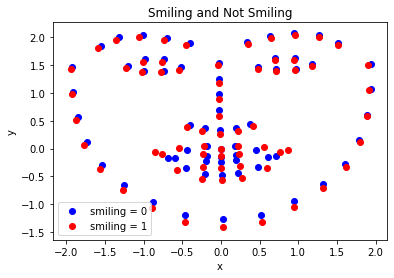

In [9]:
## Average each column
after_average_smiling_1 = np.average(smiling_1, axis = 0)
after_average_smiling_1_x = after_average_smiling_1[::2]
after_average_smiling_1_y = after_average_smiling_1[1::2]

after_average_smiling_0 = np.average(smiling_0, axis = 0)
after_average_smiling_0_x = after_average_smiling_0[::2]
after_average_smiling_0_y = after_average_smiling_0[1::2]

# sns.scatterplot(after_average_smiling_1_x, after_average_smiling_1_y, ax = ax[0])
# ax[0].set(xlabel="x", ylabel = "y", title ="Smiling")
# sns.scatterplot(after_average_smiling_0_x, after_average_smiling_0_y, ax = ax[1])
# ax[1].set(xlabel="x", ylabel = "y", title ="Not Smiling")

smiling_0_plt = plt.scatter(after_average_smiling_0_x, after_average_smiling_0_y, color ="blue", label="Not Smiling")
smiling_1_plt = plt.scatter(after_average_smiling_1_x, after_average_smiling_1_y, color ="red", label="Smiling")
plt.legend(["smiling = 0", "smiling = 1"])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Smiling and Not Smiling')

plt.show()

In [79]:
# list(zip(smiling_1['x50'], smiling_0['x50']))


[(-0.218, -0.183),
 (-0.228, -0.243),
 (-0.23800000000000002, -0.165),
 (-0.251, -0.102),
 (-0.18, -0.225),
 (-0.209, -0.14800000000000002),
 (-0.218, -0.14400000000000002),
 (-0.201, -0.201),
 (-0.266, -0.187),
 (-0.27899999999999997, -0.15),
 (-0.26, -0.156),
 (-0.20800000000000002, -0.215),
 (-0.179, -0.135),
 (-0.22, -0.182),
 (-0.226, -0.18899999999999997),
 (-0.17, -0.21),
 (-0.25, -0.212),
 (-0.196, -0.165),
 (-0.228, -0.215),
 (-0.201, -0.13699999999999998),
 (-0.265, -0.188),
 (-0.27899999999999997, -0.188),
 (-0.21899999999999997, -0.14300000000000002),
 (-0.18100000000000002, -0.145),
 (-0.19699999999999998, -0.19899999999999998),
 (-0.171, -0.17),
 (-0.161, -0.188),
 (-0.188, -0.16399999999999998),
 (-0.198, -0.126),
 (-0.233, -0.187),
 (-0.23600000000000002, -0.23600000000000002),
 (-0.22699999999999998, -0.21600000000000003),
 (-0.228, -0.16699999999999998),
 (-0.185, -0.179),
 (-0.218, -0.087),
 (-0.213, -0.159),
 (-0.244, -0.17300000000000001),
 (-0.217, -0.228),
 (-0.2

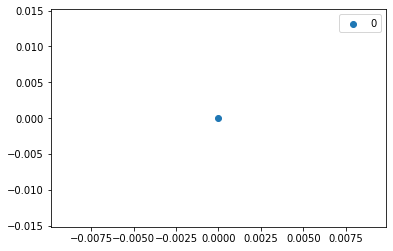

In [70]:
# ys = [after_average_smiling_0_x[51], after_average_smiling_0_y[49], after_average_smiling_0_y[30]]
# yx = [after_average_smiling_0_y[51], after_average_smiling_0_x[49], after_average_smiling_0_x[30]]
# xs = [after_average_smiling_1_x[51], after_average_smiling_1_y[49], after_average_smiling_1_y[30]]
# xy = [after_average_smiling_1_y[51], after_average_smiling_1_x[49], after_average_smiling_1_x[30]]

# ys = [after_average_smiling_0_x[51]]
# yx = [after_average_smiling_0_y[51]]
xs = [after_average_smiling_1_x[51]]
xy = [after_average_smiling_1_y[51]]
# plt.scatter(xs,xy, label = '1' )
plt.scatter(ys, yx, label ='0')
plt.legend()

### (c) (2 points) There are different measures that can be used in decision trees when evaluat-ing the quality of a split. What measure of purity at a node does the DecisionTreeClassifier in sklearn use for classification by default? What is the advantage, if any, of using this measure compared to entropy?

By default, the DecisionTreeclassifier in sklearn uses Gini Impurity for the criterion
in the DecisionTreeClassifier. The formula for Gini Impurity is 1 - ni
=1p2(ci) where
p(ci) is the probability of ci in a node.
The advantage of using Gini Impurity over Entropy is that it does not have log in
the equation which can require less computation and the results are basically the
same.

### (d) (3 points) One of the hyper-parameters of a decision tree classifier is the maximum depth of the tree. What impact does smaller or larger values of this parameter have? Give one potential problem for small values and two for large values.

The impact of having a small value for max depth would be the decision tree might
not able to capture the pattern for the data. In another word, the tree stops when
the impurity is still high and the predictions would be inaccurate. For high value for
max depth, one of the impacts would be overfitting. High depth makes the splitting
perfectly in training data while it behaviour poorly in test data since is not exactly
like training data. Secondly, huge memory is used to store and to calculate for the
tree. Accuracy drops after certain depth of a tree. Therefore, resources are wasted.

### (e) (6 points) Train three dierent decision tree classiers with a maximum depth of 2, 8, and 20 respectively. Report the maximum depth, the training accuracy (in %), and the test accuracy (in %) for each of the three trees. Comment on which model is best and why it is best.
Hint: Set random_state = 2001 and use the predict() method of the DecisionTreeClas- sifier so that you do not need to set a threshold on the output predictions. You can set the maximum depth of the decision tree using the max_depth hyper-parameter.

#### Depth= 2, 8, 20

In [10]:
def predict_score_with_different_depth(x):
    classifier = DecisionTreeClassifier(max_depth = x, random_state = 2001)
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    print("Now with depth ", x)
#     print(y_train_pred)
    print('y_train_pred: ',accuracy_score(y_train, y_train_pred))
    y_test_pred = classifier.predict(X_test)
#     print(y_test_pred)
    print('y_test_pred: ',accuracy_score(y_test, y_test_pred))
    print()

In [11]:
depths = [2, 8, 20]
for x in depths:
    predict_score_with_different_depth(x)

Now with depth  2
y_train_pred:  0.7947916666666667
y_test_pred:  0.7816666666666666

Now with depth  8
y_train_pred:  0.9335416666666667
y_test_pred:  0.8408333333333333

Now with depth  20
y_train_pred:  1.0
y_test_pred:  0.815



### (f) (5 points) Report the names of the top three most important attributes, in order of importance, according to the Gini importance from DecisionTreeClassifier. Does the one with the highest importance make sense in the context of this classification task?
Hint: Use the trained model with max_depth = 8 and again set random_state = 2001.

In [12]:
classifier = DecisionTreeClassifier(max_depth = 8, random_state = 2001)
classifier.fit(X_train, y_train)
classifier.feature_importances_

array([0.        , 0.00171789, 0.00424141, 0.00931392, 0.00099457,
       0.        , 0.00800374, 0.        , 0.        , 0.        ,
       0.00554869, 0.        , 0.        , 0.        , 0.        ,
       0.03554359, 0.        , 0.03275378, 0.        , 0.00569425,
       0.        , 0.        , 0.        , 0.00097483, 0.        ,
       0.00294131, 0.        , 0.        , 0.00221963, 0.00251957,
       0.        , 0.        , 0.        , 0.        , 0.00250062,
       0.        , 0.00097417, 0.00585508, 0.        , 0.        ,
       0.00195484, 0.        , 0.        , 0.00158038, 0.00078737,
       0.00285785, 0.00087485, 0.        , 0.        , 0.00481308,
       0.        , 0.        , 0.        , 0.0015585 , 0.        ,
       0.        , 0.        , 0.00136318, 0.        , 0.08831447,
       0.        , 0.0053233 , 0.        , 0.00246417, 0.00095745,
       0.01742446, 0.        , 0.00141094, 0.        , 0.00125979,
       0.        , 0.        , 0.00330107, 0.        , 0.     

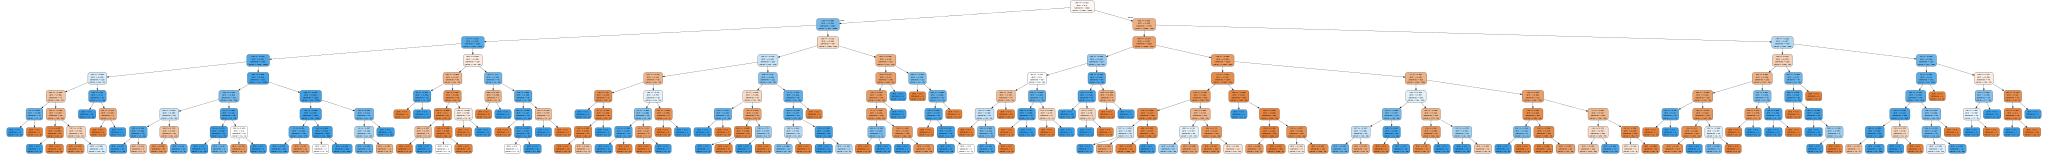

In [73]:
dot_data = export_graphviz(classifier, out_file=None, 
    feature_names= list(X_train.columns.tolist()),  
#     class_names=X['Approve'].unique(),  
    filled=True, rounded=True,  
    special_characters=False, max_depth = 8)
graph = graphviz.Source(dot_data)
graph

In [14]:
X_train.columns.tolist()

['x0',
 'y0',
 'x1',
 'y1',
 'x2',
 'y2',
 'x3',
 'y3',
 'x4',
 'y4',
 'x5',
 'y5',
 'x6',
 'y6',
 'x7',
 'y7',
 'x8',
 'y8',
 'x9',
 'y9',
 'x10',
 'y10',
 'x11',
 'y11',
 'x12',
 'y12',
 'x13',
 'y13',
 'x14',
 'y14',
 'x15',
 'y15',
 'x16',
 'y16',
 'x17',
 'y17',
 'x18',
 'y18',
 'x19',
 'y19',
 'x20',
 'y20',
 'x21',
 'y21',
 'x22',
 'y22',
 'x23',
 'y23',
 'x24',
 'y24',
 'x25',
 'y25',
 'x26',
 'y26',
 'x27',
 'y27',
 'x28',
 'y28',
 'x29',
 'y29',
 'x30',
 'y30',
 'x31',
 'y31',
 'x32',
 'y32',
 'x33',
 'y33',
 'x34',
 'y34',
 'x35',
 'y35',
 'x36',
 'y36',
 'x37',
 'y37',
 'x38',
 'y38',
 'x39',
 'y39',
 'x40',
 'y40',
 'x41',
 'y41',
 'x42',
 'y42',
 'x43',
 'y43',
 'x44',
 'y44',
 'x45',
 'y45',
 'x46',
 'y46',
 'x47',
 'y47',
 'x48',
 'y48',
 'x49',
 'y49',
 'x50',
 'y50',
 'x51',
 'y51',
 'x52',
 'y52',
 'x53',
 'y53',
 'x54',
 'y54',
 'x55',
 'y55',
 'x56',
 'y56',
 'x57',
 'y57',
 'x58',
 'y58',
 'x59',
 'y59',
 'x60',
 'y60',
 'x61',
 'y61',
 'x62',
 'y62',
 'x63',
 'y6

In [74]:
sorted(list(zip(classifier.feature_importances_, dataset_train.columns)),reverse=True)[:3]

[(0.33040484928175073, 'x50'),
 (0.08995881431599788, 'y48'),
 (0.08831447209293988, 'y29')]

In [16]:
list(zip(dataset_train['x50'], dataset_train['smiling']))

[(-0.183, 0),
 (-0.218, 1),
 (-0.228, 1),
 (-0.243, 0),
 (-0.165, 0),
 (-0.23800000000000002, 1),
 (-0.251, 1),
 (-0.102, 0),
 (-0.18, 1),
 (-0.225, 0),
 (-0.209, 1),
 (-0.14800000000000002, 0),
 (-0.218, 1),
 (-0.201, 1),
 (-0.266, 1),
 (-0.14400000000000002, 0),
 (-0.27899999999999997, 1),
 (-0.26, 1),
 (-0.20800000000000002, 1),
 (-0.179, 1),
 (-0.22, 1),
 (-0.226, 1),
 (-0.17, 1),
 (-0.201, 0),
 (-0.25, 1),
 (-0.187, 0),
 (-0.196, 1),
 (-0.228, 1),
 (-0.15, 0),
 (-0.201, 1),
 (-0.156, 0),
 (-0.265, 1),
 (-0.215, 0),
 (-0.135, 0),
 (-0.27899999999999997, 1),
 (-0.21899999999999997, 1),
 (-0.182, 0),
 (-0.18100000000000002, 1),
 (-0.19699999999999998, 1),
 (-0.171, 1),
 (-0.18899999999999997, 0),
 (-0.21, 0),
 (-0.161, 1),
 (-0.212, 0),
 (-0.165, 0),
 (-0.215, 0),
 (-0.188, 1),
 (-0.198, 1),
 (-0.233, 1),
 (-0.13699999999999998, 0),
 (-0.188, 0),
 (-0.188, 0),
 (-0.14300000000000002, 0),
 (-0.23600000000000002, 1),
 (-0.22699999999999998, 1),
 (-0.145, 0),
 (-0.19899999999999998, 0),

In [17]:
np.average(smiling_1['x4'])

-1.566909635974304

In [18]:
np.average(smiling_0['y9']) - np.average(smiling_1['x9'])

-1.7179014146661395

In [19]:
list((np.average(smiling_1['x1']), np.average(smiling_0['x1'])))

[-1.9296192719486083, -1.9115456389452332]

In [20]:
diff_dict = {}
for i in range(dataset_train.shape[1]-1):
#     print(dataset_train.columns[i])
#     print('smiling = 0')
#     print(np.average(smiling_0.iloc[:,i]))
#     print('smiling = 1')
#     print(np.average(smiling_1.iloc[:,i]))
    key = dataset_train.columns[i]
#     print(key)
    diff = np.abs(np.average(smiling_0.iloc[:,i]) - np.average(smiling_1.iloc[:,i]))
#     print(diff)
    diff_dict[key] = diff
# sorted(diff_dict, key=diff_dict.items)
{k: v for k, v in sorted(diff_dict.items(), key=lambda item: item[1], reverse=True)}

{'x60': 0.1687339750077097,
 'x48': 0.16768205671694947,
 'x64': 0.16081592400675837,
 'x54': 0.1575990244580443,
 'y8': 0.14092872289135694,
 'y7': 0.130058967732408,
 'y9': 0.1254043669184428,
 'x59': 0.11878467017908084,
 'x55': 0.11850473220374325,
 'y66': 0.11373478723542876,
 'y54': 0.10768063901038522,
 'y67': 0.10641716189392394,
 'y30': 0.10589622162089374,
 'y65': 0.10345417515451868,
 'y6': 0.10283080818829804,
 'y57': 0.1024732481724876,
 'x49': 0.10176176101393813,
 'x53': 0.09772465306583367,
 'y48': 0.09673435810121139,
 'y58': 0.09515469419843553,
 'y10': 0.09408846593204223,
 'y56': 0.09102549526345277,
 'y64': 0.08740920901181856,
 'y29': 0.08597998271301432,
 'y5': 0.08538806503033902,
 'y4': 0.0764749673154354,
 'y60': 0.0758213229321855,
 'y33': 0.07254110697516847,
 'y11': 0.07220659077187697,
 'y28': 0.06524837315565701,
 'y3': 0.06401219384009972,
 'y12': 0.058418633459438596,
 'y32': 0.05615026299672943,
 'x56': 0.053311254348893056,
 'y34': 0.053039605439754,


In [21]:
diff_dict['x50']

0.0399560302478815

In [22]:
dataset_train.columns[49]

'y24'

In [23]:
smile_attribute_diff = np.abs(after_average_smiling_0 - after_average_smiling_1)
sorted(list(zip(smiling_0.columns, smile_attribute_diff)), reverse = True)



[('y9', 0.1254043669184428),
 ('y8', 0.14092872289135694),
 ('y7', 0.130058967732408),
 ('y67', 0.10641716189392394),
 ('y66', 0.11373478723542876),
 ('y65', 0.10345417515451868),
 ('y64', 0.08740920901181856),
 ('y63', 0.02767862711798151),
 ('y62', 0.016878016426979864),
 ('y61', 0.024418785480669405),
 ('y60', 0.0758213229321855),
 ('y6', 0.10283080818829804),
 ('y59', 0.030825965226229324),
 ('y58', 0.09515469419843553),
 ('y57', 0.1024732481724876),
 ('y56', 0.09102549526345277),
 ('y55', 0.022442294912500937),
 ('y54', 0.10768063901038522),
 ('y53', 0.05115545777936073),
 ('y52', 0.00263025830578853),
 ('y51', 0.0),
 ('y50', 0.00043356541907908774),
 ('y5', 0.08538806503033902),
 ('y49', 0.042802252520294834),
 ('y48', 0.09673435810121139),
 ('y47', 0.02891505227358615),
 ('y46', 0.02371983703324032),
 ('y45', 0.03530193414440297),
 ('y44', 0.035687274954285364),
 ('y43', 0.04193623013408265),
 ('y42', 0.043838470058332746),
 ('y41', 0.030607602798927935),
 ('y40', 0.033627562752

In [24]:
np.average(smiling_0, axis = 0)

array([-1.92372819,  1.47147546, -1.91154564,  1.02430345, -1.84506491,
        0.56968722, -1.7272499 ,  0.12020406, -1.53575984, -0.29638499,
       -1.24699108, -0.65970101, -0.88232454, -0.96576105, -0.46050426,
       -1.19922069,  0.02846126, -1.27175822,  0.5206787 , -1.19054767,
        0.94556349, -0.94995822,  1.31386288, -0.63927992,  1.60344341,
       -0.27073469,  1.78636917,  0.15355132,  1.89132535,  0.60953874,
        1.94092819,  1.07237079,  1.93935375,  1.52521095, -1.54916349,
        1.85351765, -1.31369006,  2.00002231, -1.00695091,  2.03598012,
       -0.69324503,  1.99074037, -0.40142799,  1.8955497 ,  0.33693266,
        1.91147059,  0.63187789,  2.01808479,  0.95006369,  2.07231562,
        1.26618296,  2.04412292,  1.51184949,  1.90087059, -0.02475619,
        1.54232738, -0.02216592,  1.25218499, -0.02074604,  0.97361339,
       -0.01879108,  0.69102556, -0.39399757,  0.42847018, -0.21125233,
        0.37071643, -0.00721298,  0.33555781,  0.19807627,  0.37

In [25]:
after_average_smiling_0

array([-1.92372819,  1.47147546, -1.91154564,  1.02430345, -1.84506491,
        0.56968722, -1.7272499 ,  0.12020406, -1.53575984, -0.29638499,
       -1.24699108, -0.65970101, -0.88232454, -0.96576105, -0.46050426,
       -1.19922069,  0.02846126, -1.27175822,  0.5206787 , -1.19054767,
        0.94556349, -0.94995822,  1.31386288, -0.63927992,  1.60344341,
       -0.27073469,  1.78636917,  0.15355132,  1.89132535,  0.60953874,
        1.94092819,  1.07237079,  1.93935375,  1.52521095, -1.54916349,
        1.85351765, -1.31369006,  2.00002231, -1.00695091,  2.03598012,
       -0.69324503,  1.99074037, -0.40142799,  1.8955497 ,  0.33693266,
        1.91147059,  0.63187789,  2.01808479,  0.95006369,  2.07231562,
        1.26618296,  2.04412292,  1.51184949,  1.90087059, -0.02475619,
        1.54232738, -0.02216592,  1.25218499, -0.02074604,  0.97361339,
       -0.01879108,  0.69102556, -0.39399757,  0.42847018, -0.21125233,
        0.37071643, -0.00721298,  0.33555781,  0.19807627,  0.37

In [ ]:
According to DecisionTreeClassifier, the top 3 highest importance are ’x50’, ’y48’,
’y29’ with corresponding importance vales (0.3304, 0.08996 and 0.08831). ’x50’ is
make sense since ’x50’ around the middle part(mouth/lip). As for this classification
task, the data points around the mouth play a significant role to classify whether
if it is smiling.